In [1]:
import pandas as pd
data_ = pd.read_csv('time_feature_finish.csv')[['qty__standard_deviation', 'qty__mean', 'seller_level', 'warehouse _region', 'category1']]

In [2]:
data_ = pd.get_dummies(data_)

In [4]:
data_.columns

Index(['qty__standard_deviation', 'qty__mean', 'seller_level_Large',
       'seller_level_Medium', 'seller_level_Small', 'seller_level_Special',
       'warehouse _region_东北', 'warehouse _region_华东', 'warehouse _region_华中',
       'warehouse _region_华北', 'warehouse _region_华南', 'warehouse _region_西北',
       'warehouse _region_西南', 'category1_个人护理', 'category1_传统滋补',
       'category1_厨具', 'category1_宠物生活', 'category1_家具', 'category1_家庭清洁/纸品',
       'category1_家用电器', 'category1_家装建材', 'category1_手机通讯', 'category1_数码',
       'category1_服饰内衣', 'category1_玩具乐器', 'category1_珠宝首饰', 'category1_生活日用',
       'category1_电脑、办公', 'category1_美妆护肤', 'category1_运动户外', 'category1_酒类',
       'category1_食品饮料', 'category1_鲜花/奢侈品'],
      dtype='object')

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
import pylab as plt
import seaborn as sns
warnings.filterwarnings('ignore')
S = []
K = range(2, 30)
scaler = MinMaxScaler()
data = scaler.fit_transform(data_)
for i in K:
    md = KMeans(i).fit(data)
    S.append(md.inertia_)


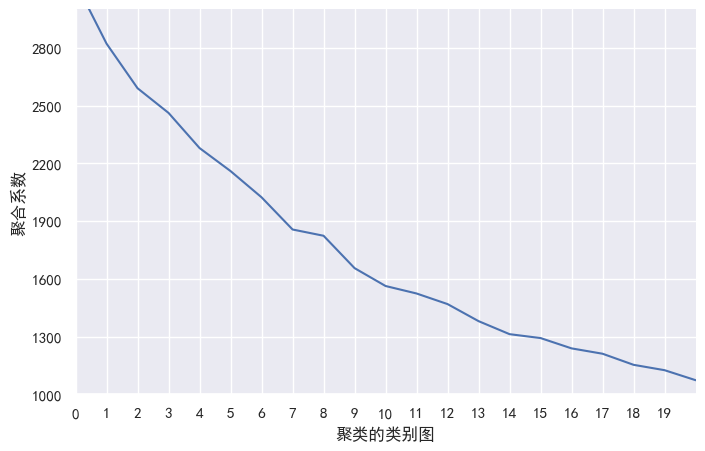

In [6]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
plt.rc('font', family = 'SimHei', size = 10)
plt.rc('axes', unicode_minus = False)
plt.xlabel('聚类的类别图')
plt.ylabel('聚合系数')
embol = pd.Series(S)
sns.lineplot(S, markers='o')
plt.xticks(range(0, 20, 1))
plt.yticks(range(1000, 3000, 300))
plt.xlim((0, 20))
plt.ylim((1000, 3000))
sns.despine()
plt.savefig(fname = '肘部图.png', dpi = 500, bbox_inches = 'tight', pad_inches = 0.0)

In [11]:
md = KMeans(7)
md.fit(data)
# 保存模型
import pickle
pickle.dump(md, open('K-meas.pkl', 'wb'))

In [12]:
import numpy as np
np.bincount(md.labels_)

array([224, 626, 291, 208, 237, 190, 220], dtype=int64)

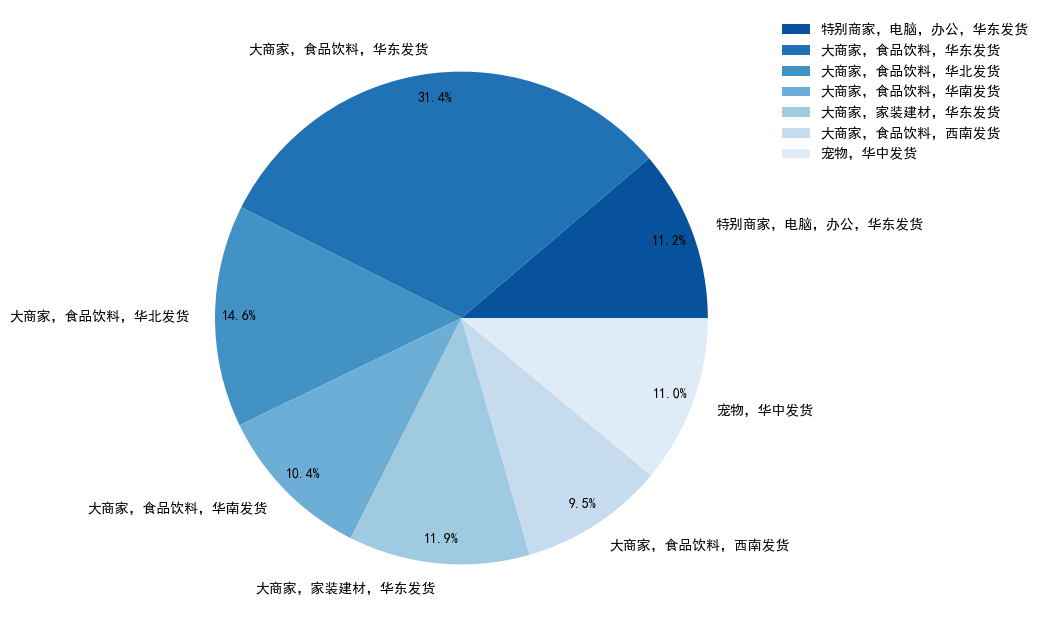

In [8]:
import seaborn as sns
import pylab as plt
import pickle
import numpy as np
plt.rc('font', family = 'SimHei', size = 10)
plt.rc('axes', unicode_minus = False)
md = pickle.load(open('K-meas.pkl', 'rb'))
pal_ = list(sns.color_palette(palette='Blues_r',
                              n_colors=7).as_hex())

plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 10})
plt.pie(x = np.bincount(md.labels_),
        labels = ['特别商家，电脑，办公，华东发货', '大商家，食品饮料，华东发货', '大商家，食品饮料，华北发货',
                   '大商家，食品饮料，华南发货', '大商家，家装建材，华东发货', '大商家，食品饮料，西南发货', '宠物，华中发货'],
        colors=pal_, autopct='%1.1f%%',
        pctdistance=0.9)
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.savefig(fname = 'K-means分类类别比例.png', dpi = 500, bbox_inches = 'tight', pad_inches = 0.0)

In [4]:
import pickle
md = pickle.load(open('K-meas.pkl', 'rb'))

In [8]:
data_['labels'] = md.labels_

In [9]:
data_.to_csv('time_cluster.csv', index = False)
data_.to_excel('time_cluster.xlsx', index = False)

<Axes: xlabel='labels'>

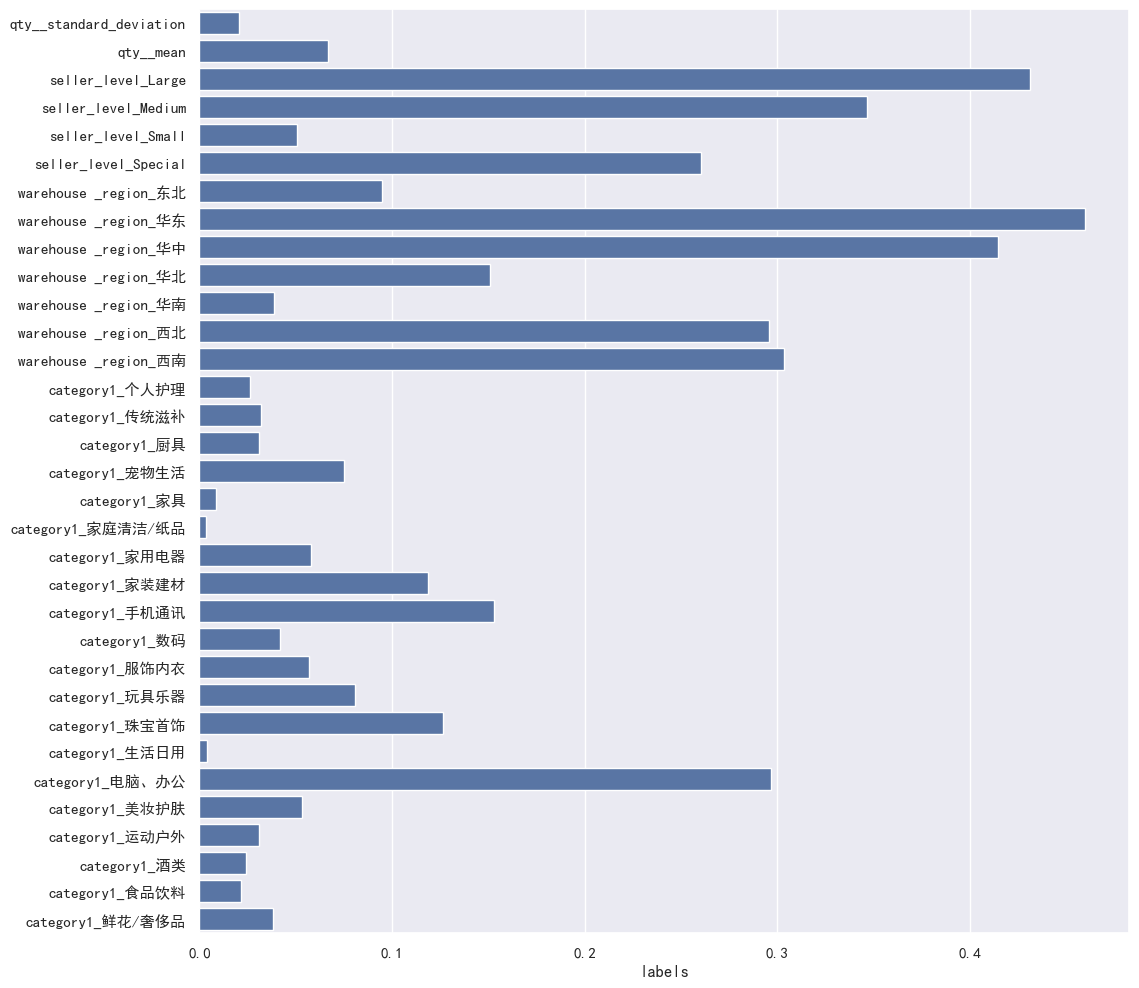

In [25]:
import pandas as pd
import seaborn as sns
import pylab as plt
_ = pd.read_csv("time_cluster.csv")
sns.set(style="darkgrid")
plt.figure(figsize=(12, 12))
plt.rc('font', family = 'SimHei', size = 3)
plt.rc('axes', unicode_minus = False)
sns.barplot(_.corr()['labels'][:-1].abs(), orient='h')